In [1]:
%config InlineBackend.figure_format = 'svg'

# Calculators

Any [GraphPESModel](../models.rst#graph_pes.core.GraphPESModel) can be used as an [ase Calculator](https://wiki.fysik.dtu.dk/ase/ase/calculators/calculators.html) by wrapping it in a [GraphPESCalculator](../analysis.rst#graph_pes.calculator.GraphPESCalculator). This allows the model to be used in any ASE workflow, such as geometry optimization, molecular dynamics, or phonon calculations.

Below, we show some example use cases.

## 1. Create a calculator

We re-use the parameters of a Lennard-Jones potential we learned in the [previous example](example.ipynb).


In [2]:
from graph_pes.models.pairwise import LennardJones

model = LennardJones(epsilon=0.14, sigma=2.27)
model

LennardJones(
  (energy_summation): EnergySummation(
    (local_transform): PerAtomShift(dim=(1,), requires_grad=True)
    (total_transform): Identity()
  )
  (epsilon): PositiveParameter(0.1400)
  (sigma): PositiveParameter(2.2700)
)

In [3]:
from graph_pes.calculator import GraphPESCalculator

calculator = GraphPESCalculator(model, cutoff=5.0)

## 2. Phonon calculations

See [the phonons section](https://wiki.fysik.dtu.dk/ase/ase/phonons.html) of the ASE documentation for more details.

In [4]:
from ase.build import bulk

structure = bulk('Cu', cubic=True)
structure

Atoms(symbols='Cu4', pbc=True, cell=[3.61, 3.61, 3.61])

WARNING, 3 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.071e-07*i)
WARNING, 3 imaginary frequencies at q = ( 0.00,  0.00,  0.00) ; (omega_q = 2.071e-07*i)


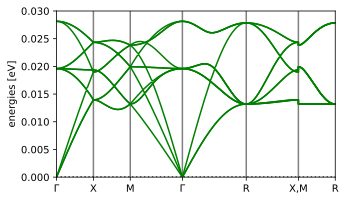

In [5]:
import matplotlib.pyplot as plt
from ase.phonons import Phonons

phonons = Phonons(structure, calculator, supercell=(7, 7, 7), delta=0.05)
phonons.run()

# read forces and assemble the dynamical matrix
phonons.read(acoustic=True)
phonons.clean()

path = structure.cell.bandpath(npoints=200)
band_structure = phonons.get_band_structure(path)

plt.figure(figsize=(5, 3))
band_structure.plot(emin=0, emax=0.03, ax=plt.gca());